In [138]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [139]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [140]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [141]:
# Calcular a primeira e a segunda derivada
first_derivative = np.diff(inertia)
second_derivative = np.diff(first_derivative)

# Encontrar o ponto onde a segunda derivada muda de 
optimal_k_index = np.argmax(second_derivative) + 2  # +2 porque np.diff reduz o tamanho do array original
optimal_k = K[optimal_k_index]

print(f'O número ótimo de clusters é: {optimal_k}')

O número ótimo de clusters é: 3


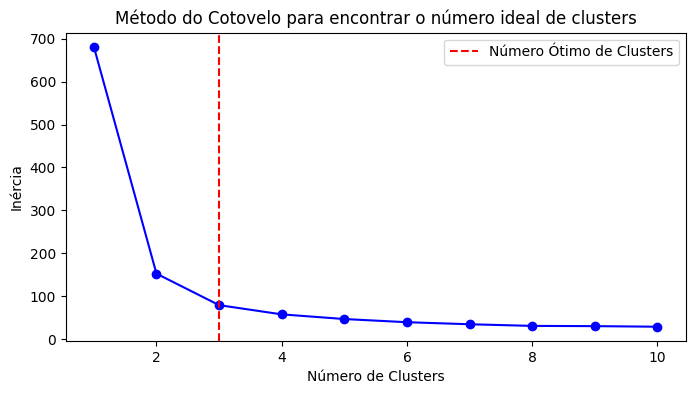

In [146]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para encontrar o número ideal de clusters')
plt.axvline(x=optimal_k, color='r', linestyle='--', label='Número Ótimo de Clusters')
plt.legend()
plt.show()

In [143]:
# Aplicar o K-Means com o número ótimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Re-etiquetar os clusters para corresponder ao rótulo original o máximo possível
labels = np.zeros_like(y_kmeans)
for i in range(optimal_k):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

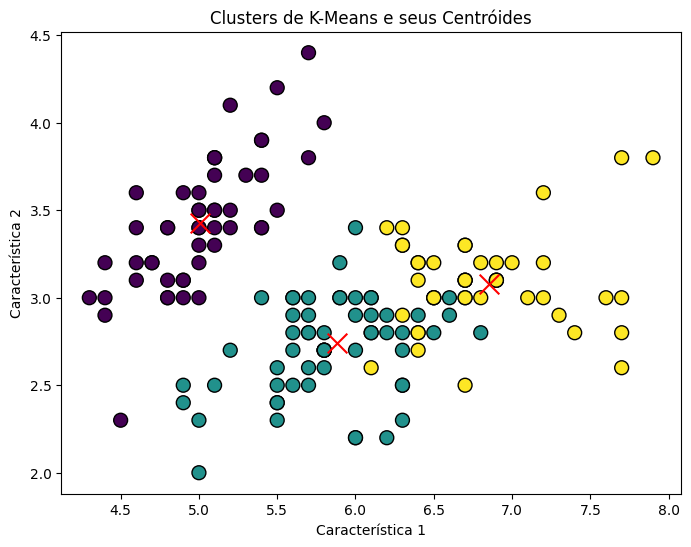

In [144]:
# Visualização opcional dos clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.title('Clusters de K-Means e seus Centróides')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

Matriz de Confusão:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


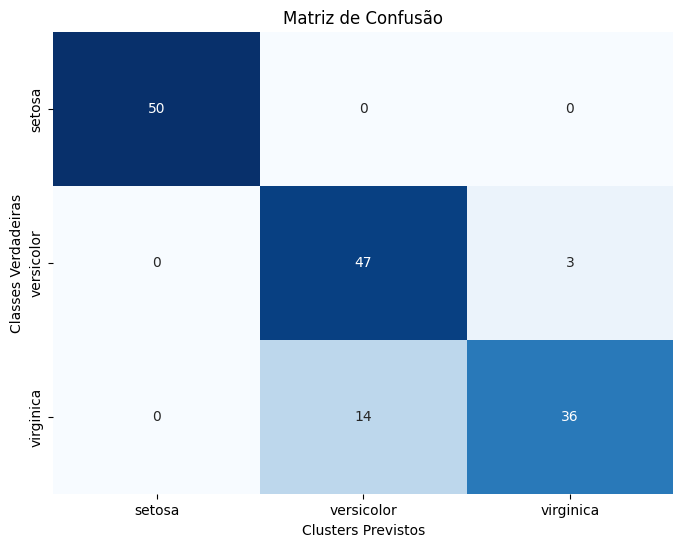

In [145]:
# Matriz de confusão
conf_matrix = confusion_matrix(y, labels)
print("Matriz de Confusão:")
print(conf_matrix)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Clusters Previstos')
plt.ylabel('Classes Verdadeiras')
plt.title('Matriz de Confusão')
plt.show()

C:\Users\lucas.mesquita.souza\AppData\Local\Temp\ipykernel_24180\1999682086.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=metrics, palette='viridis')


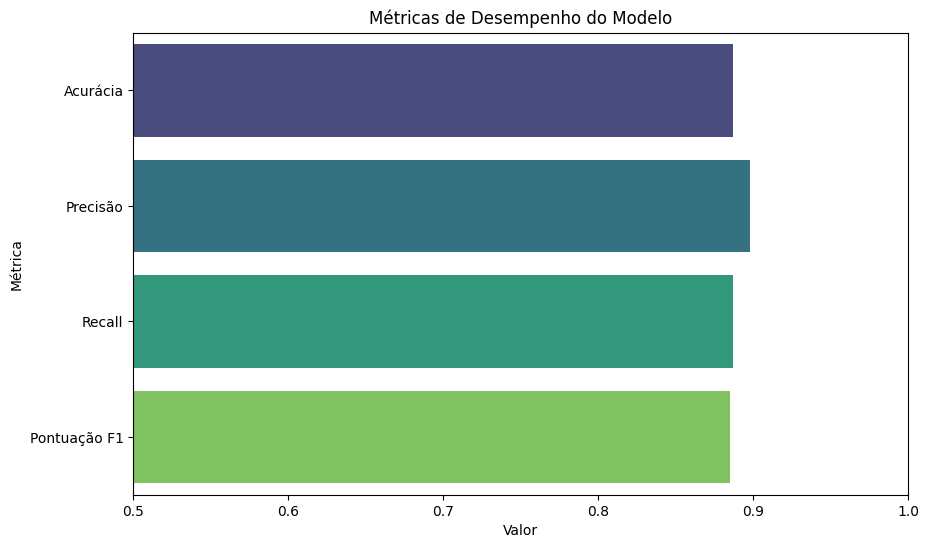

In [150]:
# Calcular as métricas de desempenho
accuracy = accuracy_score(y, labels)
precision = precision_score(y, labels, average='weighted')
recall = recall_score(y, labels, average='weighted')
f1 = f1_score(y, labels, average='weighted')

# Criar um gráfico de barras para visualizar as métricas
metrics = ['Acurácia', 'Precisão', 'Recall', 'Pontuação F1']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette='viridis')

# Ajustar os limites do eixo x
plt.xlim(0.5, 1)  # Definindo o intervalo de 0 a 1 para representar as métricas de desempenho

plt.title('Métricas de Desempenho do Modelo')
plt.xlabel('Valor')
plt.ylabel('Métrica')
plt.show()

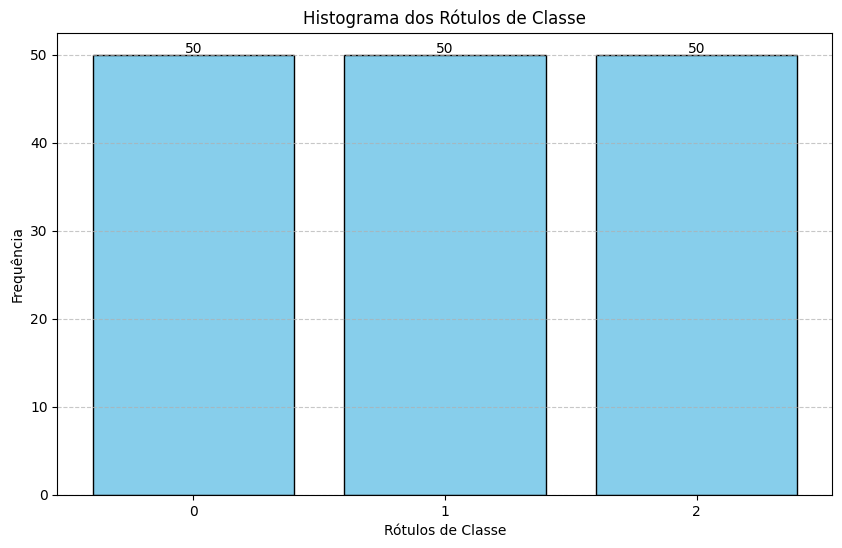

In [153]:
# Contar a frequência de cada classe
unique_labels, counts = np.unique(y, return_counts=True)

# Criar um gráfico de barras para visualizar a frequência de cada classe
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Rótulos de Classe')
plt.ylabel('Frequência')
plt.title('Histograma dos Rótulos de Classe')
plt.xticks(unique_labels)  # Definir os rótulos do eixo x como os valores únicos de y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de classe acima de cada barra
for i in range(len(unique_labels)):
    plt.text(unique_labels[i], counts[i] + 0.2, str(counts[i]), ha='center')

plt.show()

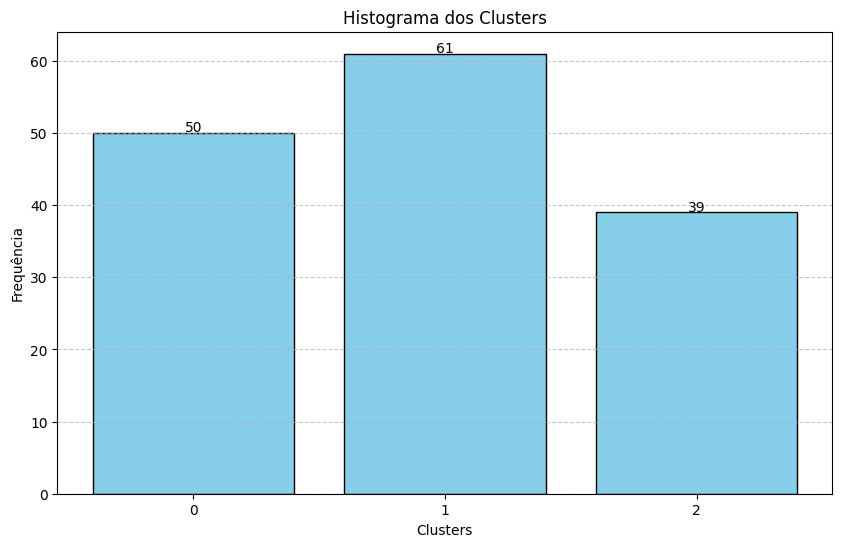

In [154]:
# Calcular a frequência de cada cluster
unique_clusters, counts = np.unique(labels, return_counts=True)

# Criar um gráfico de barras para visualizar a frequência de cada cluster
plt.figure(figsize=(10, 6))
plt.bar(unique_clusters, counts, color='skyblue', edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Frequência')
plt.title('Histograma dos Clusters')
plt.xticks(unique_clusters)  # Definir os rótulos do eixo x como os valores únicos de labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar frequência acima de cada barra
for i in range(len(unique_clusters)):
    plt.text(unique_clusters[i], counts[i] + 0.2, str(counts[i]), ha='center')

plt.show()